In [241]:
import pandas as pd
import math
import numpy as np
from random import randint

import matplotlib.pyplot as plt
import matplotlib


pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000000)

In [385]:
data = pd.read_csv('data_with_features_every_week.csv')
data = data.drop('Unnamed: 0', axis=1)

print(data.shape)
data = data[data['avg_spending_previous_weeks']<300]
data = data[data['previous_amount_spent']<500]
data = data[data['SALES_VALUE']<400]

data = data.sort_values('WEEK_NO')

data = data.dropna().reset_index().drop('index',axis=1)


# additional features

noise = np.random.normal(0,1,data.shape[0])
noise

noise2 = np.random.normal(0,1,data.shape[0])
noise2

#time spent on the app's discount section
data['time_spent_on_app'] = (data['SALES_VALUE']/10 - data['previous_amount_spent'] + 3*noise + 400) *0.2
data['time_spent_on_app'] = data['time_spent_on_app'].apply(lambda x: x+100 if x<0 else x)
min_val = int(data['time_spent_on_app'].min())
max_val = int(data['time_spent_on_app'].max())
data['time_spent_on_app'] = data['time_spent_on_app'].apply(lambda x: x+100 if x<(randint(min_val,max_val)*0.3) else x)

# difference in fuel price between this shop and the average in the area
data['difference_fuel_price'] = data['SALES_VALUE']/20 *2*data['Monday %'] + 2*noise2

# data['lower_fake'] = data['SALES_VALUE'].apply(lambda x: x if x<50 else randint(30,70))/20 + 10*noise3 + data['previous_amount_spent']
# data['higher_fake'] = data['SALES_VALUE'].apply(lambda x: x if x>50 else randint(30,70))/20 - 10*noise3

print(data.shape)

(255000, 72)
(30974, 74)


In [386]:
data['difference_fuel_price'].max()

27.20446203364743

In [387]:
clusters = pd.read_csv('household_clusters.csv').drop('Unnamed: 0', axis=1)
clusters['household_key'] = clusters['household_key'].astype(int)
clusters.shape

(728, 2)

In [388]:
data.shape

(30974, 74)

In [389]:
data = data.merge(clusters, on='household_key', how='left')
data.dropna(inplace=True)
# data['cluster'] = data['cluster'].astype(str)
data.head()

,WEEK_NO,household_key,SALES_VALUE,QUANTITY,month_num,year,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,BAG SNACKS | POTATO CHIPS,BAG SNACKS | TORTILLA/NACHO CHIPS,BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHEAT/MULTIGRAIN BR,BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHITE BREAD,BAKED SWEET GOODS | SNACK CAKE - MULTI PACK,BEERS/ALES | BEERALEMALT LIQUORS,CANDY - CHECKLANE | CANDY BARS (SINGLES)(INCLUDING,CHEESE | SHREDDED CHEESE,COLD CEREAL | KIDS CEREAL,FLUID MILK PRODUCTS | FLUID MILK WHITE ONLY,FRZN MEAT/MEAT DINNERS | FRZN SS PREMIUM ENTREES/DNRS/N,FRZN MEAT/MEAT DINNERS | SS ECONOMY ENTREES/DINNERS ALL,FRZN VEGETABLE/VEG DSH | FRZN BAGGED VEGETABLES - PLAIN,REFRGRATD JUICES/DRNKS | DAIRY CASE 100% PURE JUICE - O,SOFT DRINKS | SFT DRNK 2 LITER BTL CARB INCL,SOFT DRINKS | SFT DRNK SNGL SRV BTL CARB (EX,SOFT DRINKS | SOFT DRINKS 12/18&15PK CAN CAR,SOUP | CONDENSED SOUP,TROPICAL FRUIT | BANANAS,YOGURT | YOGURT NOT MULTI-PACKS,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,avg_visits_per_month,avg_visits_per_week,weighted_avg,avg_spending_previous_weeks_real_time,std_spending_previous_weeks_real_time,var_spending_previous_weeks_real_time,quan25_spending_previous_weeks_real_time,quan50_spending_previous_weeks_real_time,quan75_spending_previous_weeks_real_time,avg_spending_previous_weeks,std_spending_previous_weeks,var_spending_previous_weeks,quan25_spending_previous_weeks,quan50_spending_previous_weeks,quan75_spending_previous_weeks,DAY,last_shopping_day,days_since_last_shopping,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,quantity_bought_last_week,previous_amount_spent,previous_quantity,month,season,month_x,month_y,time_spent_on_app,difference_fuel_price,cluster
0,10,1364,46.02,20.0,4,2019,65+,B,100-124K,Homeowner,1.0,0.0,1.0,0.0,0.019355,0.031915,0.049505,0.071038,0.000000,0.001905,0.000000,0.073034,0.048544,0.191589,0.000000,0.000000,0.091270,0.022222,0.002457,0.002907,0.007067,0.037313,0.150602,0.018595,0.105263,0.138158,0.100877,0.152412,0.161184,0.143640,0.198465,0.160088,0.740132,0.099781,2.250000,1.666667,23.313636,20.688140,57.496780,3305.879744,0.0,0.00,0.000,21.293333,13.174694,173.572575,11.37,21.26,33.23,66.0,62.0,4.0,9.0,1.0,27.13,15.0,27.13,15.0,April,spring,0.865927,0.500171,74.796208,-0.612219,6
1,10,2427,35.27,17.0,4,2019,35-44,A,50-74K,Homeowner,3.0,1.0,2.0,1.0,0.412903,0.521277,0.435644,0.005464,0.086957,0.000000,0.035197,0.028090,0.262136,0.158879,0.711779,0.004484,0.000000,0.411111,0.007371,0.046512,0.254417,0.007463,0.325301,0.039256,0.156460,0.199292,0.072566,0.094867,0.093805,0.139469,0.243540,0.159646,0.597876,0.242478,4.250000,2.111111,70.454727,26.659394,41.772712,1744.959494,0.0,13.53,35.345,66.221111,23.902262,571.318111,49.89,65.48,75.35,64.0,62.0,2.0,9.0,1.0,108.44,57.0,108.44,57.0,April,spring,0.865927,0.500171,59.005653,1.984990,3
2,10,2110,258.35,80.0,4,2019,35-44,A,125-149K,Homeowner,2.0,0.0,2.0,0.0,0.045161,0.138298,0.000000,0.049180,0.000000,0.015238,0.062112,0.033708,0.271845,0.443925,0.000000,0.000000,0.075397,0.233333,0.019656,0.011628,0.021201,0.029851,0.518072,0.018595,0.119642,0.169288,0.126735,0.161887,0.180697,0.079248,0.162504,0.486278,0.493987,0.019735,6.666667,3.111111,196.172909,7.060698,19.577231,383.267955,0.0,0.00,0.000,200.802222,64.349913,4140.911294,152.86,193.26,276.49,62.0,59.0,3.0,9.0,1.0,140.50,45.0,140.50,45.0,April,spring,0.865927,0.500171,57.716085,5.276004,7
3,10,1130,59.19,28.0,4,2019,55-64,U,25-34K,Renter,3.0,1.0,2.0,1.0,0.129032,0.063830,0.128713,0.136612,0.086957,0.068571,0.035197,0.157303,0.155340,0.158879,0.010025,0.062780,0.103175,0.155556,0.088452,0.127907,0.162544,0.104478,0.108434,0.004132,0.098173,0.120697,0.159796,0.129622,0.150871,0.240119,0.100722,0.135997,0.465363,0.398640,5.909091,2.444444,68.679091,17.332676,35.754673,1278.396651,0.0,0.00,22.720,58.655556,47.955188,2299.700078,24.54,24.91,109.12,68.0,63.0,5.0,9.0,

In [390]:
weeks_avgs = pd.DataFrame(data.groupby('WEEK_NO')['difference_fuel_price'].mean()).reset_index()
weeks_avgs['difference_fuel_price'] = weeks_avgs['difference_fuel_price']*10-10
weeks_avgs['difference_fuel_price'] = weeks_avgs['difference_fuel_price'].astype(int)
data = data.merge(weeks_avgs, on='WEEK_NO')
data.rename(columns={'difference_fuel_price_y':'difference_fuel_price'}, inplace=True)
data.drop('difference_fuel_price_x', axis=1, inplace=True)
weeks_avgs.head()

,WEEK_NO,difference_fuel_price
0,10,6
1,11,8
2,12,6
3,13,0
4,14,-2


In [391]:
data.columns

Index(['WEEK_NO', 'household_key', 'SALES_VALUE', 'QUANTITY', 'month_num',
       'year', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'Adults',
       'Child Boolean', 'BAG SNACKS | POTATO CHIPS',
       'BAG SNACKS | TORTILLA/NACHO CHIPS',
       'BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHEAT/MULTIGRAIN BR',
       'BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHITE BREAD',
       'BAKED SWEET GOODS | SNACK CAKE - MULTI PACK',
       'BEERS/ALES | BEERALEMALT LIQUORS',
       'CANDY - CHECKLANE | CANDY BARS (SINGLES)(INCLUDING',
       'CHEESE | SHREDDED CHEESE', 'COLD CEREAL | KIDS CEREAL',
       'FLUID MILK PRODUCTS | FLUID MILK WHITE ONLY',
       'FRZN MEAT/MEAT DINNERS | FRZN SS PREMIUM ENTREES/DNRS/N',
       'FRZN MEAT/MEAT DINNERS | SS ECONOMY ENTREES/DINNERS ALL',
       'FRZN VEGETABLE/VEG DSH | FRZN BAGGED VEGETABLES - PLAIN',
       'REFRGRATD JUICES/DRNKS | DAIRY CASE 100% PURE JUICE - O',
       'SOFT DRINKS 

In [392]:
columns_to_predict_on = ['month_num',
       'Monday %', 'Tuesday %', 'Wednesday %', 'Thursday %', 'Friday %',
       'Saturday %', 'Sunday %', 'morning %', 'afternoon %', 'evening %',
                         
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
                         
        'last_shopping_day', 'days_since_last_shopping',
       'last_shopping_week', 'weeks_since_last_shopping',
       'amount_spent_last_week', 'previous_amount_spent', 'month', 'season',
       'month_x', 'month_y', 'time_spent_on_app', 'cluster',
       'difference_fuel_price']

columns_to_predict_on = ['month_num',
                         
                         'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'Adults',
       'Child Boolean', 
                         
                         'BAG SNACKS | POTATO CHIPS',
       'BAG SNACKS | TORTILLA/NACHO CHIPS',
       'BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHEAT/MULTIGRAIN BR',
       'BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHITE BREAD',
       'BAKED SWEET GOODS | SNACK CAKE - MULTI PACK',
       'BEERS/ALES | BEERALEMALT LIQUORS',
       'CANDY - CHECKLANE | CANDY BARS (SINGLES)(INCLUDING',
       'CHEESE | SHREDDED CHEESE', 'COLD CEREAL | KIDS CEREAL',
       'FLUID MILK PRODUCTS | FLUID MILK WHITE ONLY',
       'FRZN MEAT/MEAT DINNERS | FRZN SS PREMIUM ENTREES/DNRS/N',
       'FRZN MEAT/MEAT DINNERS | SS ECONOMY ENTREES/DINNERS ALL',
       'FRZN VEGETABLE/VEG DSH | FRZN BAGGED VEGETABLES - PLAIN',
       'REFRGRATD JUICES/DRNKS | DAIRY CASE 100% PURE JUICE - O',
       'SOFT DRINKS | SFT DRNK 2 LITER BTL CARB INCL',
       'SOFT DRINKS | SFT DRNK SNGL SRV BTL CARB (EX',
       'SOFT DRINKS | SOFT DRINKS 12/18&15PK CAN CAR', 'SOUP | CONDENSED SOUP',
       'TROPICAL FRUIT | BANANAS', 'YOGURT | YOGURT NOT MULTI-PACKS',
                         
       'Monday %', 'Tuesday %', 'Wednesday %', 'Thursday %', 'Friday %',
       'Saturday %', 'Sunday %', 'morning %', 'afternoon %', 'evening %',
                         
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
                         
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
                         
       'last_shopping_day', 'days_since_last_shopping',
       'last_shopping_week', 'weeks_since_last_shopping',
       'amount_spent_last_week', 'quantity_bought_last_week',
       'previous_amount_spent', 'previous_quantity',
                         
                         'month', 'season',
       'month_x', 'month_y', 
                         
                         'time_spent_on_app', 'cluster',
       'difference_fuel_price']



# columns_to_predict_on = ['cluster']


In [393]:
data.shape

(30974, 75)

In [394]:
data[columns_to_predict_on].head()

,month_num,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,BAG SNACKS | POTATO CHIPS,BAG SNACKS | TORTILLA/NACHO CHIPS,BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHEAT/MULTIGRAIN BR,BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHITE BREAD,BAKED SWEET GOODS | SNACK CAKE - MULTI PACK,BEERS/ALES | BEERALEMALT LIQUORS,CANDY - CHECKLANE | CANDY BARS (SINGLES)(INCLUDING,CHEESE | SHREDDED CHEESE,COLD CEREAL | KIDS CEREAL,FLUID MILK PRODUCTS | FLUID MILK WHITE ONLY,FRZN MEAT/MEAT DINNERS | FRZN SS PREMIUM ENTREES/DNRS/N,FRZN MEAT/MEAT DINNERS | SS ECONOMY ENTREES/DINNERS ALL,FRZN VEGETABLE/VEG DSH | FRZN BAGGED VEGETABLES - PLAIN,REFRGRATD JUICES/DRNKS | DAIRY CASE 100% PURE JUICE - O,SOFT DRINKS | SFT DRNK 2 LITER BTL CARB INCL,SOFT DRINKS | SFT DRNK SNGL SRV BTL CARB (EX,SOFT DRINKS | SOFT DRINKS 12/18&15PK CAN CAR,SOUP | CONDENSED SOUP,TROPICAL FRUIT | BANANAS,YOGURT | YOGURT NOT MULTI-PACKS,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,avg_visits_per_month,avg_visits_per_week,weighted_avg,avg_spending_previous_weeks_real_time,std_spending_previous_weeks_real_time,var_spending_previous_weeks_real_time,quan25_spending_previous_weeks_real_time,quan50_spending_previous_weeks_real_time,quan75_spending_previous_weeks_real_time,avg_spending_previous_weeks,std_spending_previous_weeks,var_spending_previous_weeks,quan25_spending_previous_weeks,quan50_spending_previous_weeks,quan75_spending_previous_weeks,last_shopping_day,days_since_last_shopping,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,quantity_bought_last_week,previous_amount_spent,previous_quantity,month,season,month_x,month_y,time_spent_on_app,cluster,difference_fuel_price
0,4,65+,B,100-124K,Homeowner,1.0,0.0,1.0,0.0,0.019355,0.031915,0.049505,0.071038,0.000000,0.001905,0.000000,0.073034,0.048544,0.191589,0.000000,0.000000,0.091270,0.022222,0.002457,0.002907,0.007067,0.037313,0.150602,0.018595,0.105263,0.138158,0.100877,0.152412,0.161184,0.143640,0.198465,0.160088,0.740132,0.099781,2.250000,1.666667,23.313636,20.688140,57.496780,3305.879744,0.0,0.00,0.000,21.293333,13.174694,173.572575,11.37,21.26,33.23,62.0,4.0,9.0,1.0,27.13,15.0,27.13,15.0,April,spring,0.865927,0.500171,74.796208,6,6
1,4,35-44,A,50-74K,Homeowner,3.0,1.0,2.0,1.0,0.412903,0.521277,0.435644,0.005464,0.086957,0.000000,0.035197,0.028090,0.262136,0.158879,0.711779,0.004484,0.000000,0.411111,0.007371,0.046512,0.254417,0.007463,0.325301,0.039256,0.156460,0.199292,0.072566,0.094867,0.093805,0.139469,0.243540,0.159646,0.597876,0.242478,4.250000,2.111111,70.454727,26.659394,41.772712,1744.959494,0.0,13.53,35.345,66.221111,23.902262,571.318111,49.89,65.48,75.35,62.0,2.0,9.0,1.0,108.44,57.0,108.44,57.0,April,spring,0.865927,0.500171,59.005653,3,6
2,4,35-44,A,125-149K,Homeowner,2.0,0.0,2.0,0.0,0.045161,0.138298,0.000000,0.049180,0.000000,0.015238,0.062112,0.033708,0.271845,0.443925,0.000000,0.000000,0.075397,0.233333,0.019656,0.011628,0.021201,0.029851,0.518072,0.018595,0.119642,0.169288,0.126735,0.161887,0.180697,0.079248,0.162504,0.486278,0.493987,0.019735,6.666667,3.111111,196.172909,7.060698,19.577231,383.267955,0.0,0.00,0.000,200.802222,64.349913,4140.911294,152.86,193.26,276.49,59.0,3.0,9.0,1.0,140.50,45.0,140.50,45.0,April,spring,0.865927,0.500171,57.716085,7,6
3,4,55-64,U,25-34K,Renter,3.0,1.0,2.0,1.0,0.129032,0.063830,0.128713,0.136612,0.086957,0.068571,0.035197,0.157303,0.155340,0.158879,0.010025,0.062780,0.103175,0.155556,0.088452,0.127907,0.162544,0.104478,0.108434,0.004132,0.098173,0.120697,0.159796,0.129622,0.150871,0.240119,0.100722,0.135997,0.465363,0.398640,5.909091,2.444444,68.679091,17.332676,35.754673,1278.396651,0.0,0.00,22.720,58.655556,47.955188,2299.700078,24.54,24.91,109.12,63.0,5.0,9.0,1.0,130.38,74.0,130.38,74.0,April,spring,0.865927,0.500171,55.953913,1,6
4,4,45-54,A,25-34K,Homeowner,5.0,3.0,2.0,1.0,0.200000,0.404255,0.277228,0.360656,0.074534,0.000000,0.173913,0.370787,0

In [395]:
data[columns_to_predict_on].isna().sum()

month_num                                                  0
AGE_DESC                                                   0
MARITAL_STATUS_CODE                                        0
INCOME_DESC                                                0
HOMEOWNER_DESC                                             0
HOUSEHOLD_SIZE_DESC                                        0
KID_CATEGORY_DESC                                          0
Adults                                                     0
Child Boolean                                              0
BAG SNACKS | POTATO CHIPS                                  0
BAG SNACKS | TORTILLA/NACHO CHIPS                          0
BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHEAT/MULTIGRAIN BR    0
BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHITE BREAD            0
BAKED SWEET GOODS | SNACK CAKE - MULTI PACK                0
BEERS/ALES | BEERALEMALT LIQUORS                           0
CANDY - CHECKLANE | CANDY BARS (SINGLES)(INCLUDING         0
CHEESE | SHREDDED CHEESE

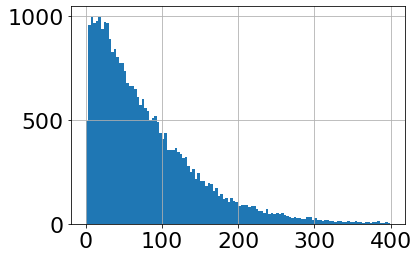

In [396]:
data['SALES_VALUE'].hist(bins=120)

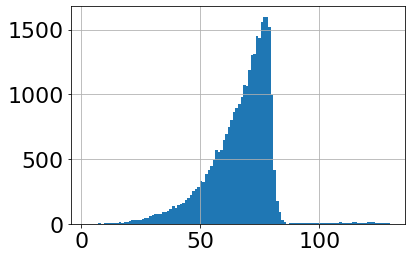

In [397]:
data['time_spent_on_app'].hist(bins=120)

In [428]:
data['SALES_VALUE'].corr(data['time_spent_on_app'])

-0.2010638756399608

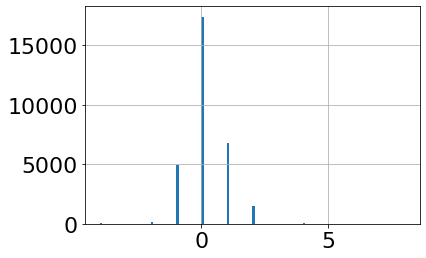

In [398]:
data['difference_fuel_price'].hist(bins=120)

In [348]:
X = data[columns_to_predict_on]
X = pd.get_dummies(X)
print(X.shape)

y = data['SALES_VALUE']

# option 1 - temporal split
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

#option 2 - random split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#option 3 - split based on household id
# from sklearn.model_selection import GroupShuffleSplit
# train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 10).split(X, groups=data['household_key']))

# X_train = X.iloc[train_inds]
# y_train = y.iloc[train_inds]
# X_test = X.iloc[test_inds]
# y_test = y.iloc[test_inds]


(30974, 104)


In [306]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [308]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 30
bst = xgb.train(param, dtrain, num_round, evallist)



[0]	eval-rmse:62.874	train-rmse:58.5223
[1]	eval-rmse:54.4766	train-rmse:50.5225
[2]	eval-rmse:52.6663	train-rmse:48.3771
[3]	eval-rmse:52.6674	train-rmse:47.7753
[4]	eval-rmse:49.8465	train-rmse:44.3843
[5]	eval-rmse:47.7732	train-rmse:42.1663
[6]	eval-rmse:45.7962	train-rmse:40.0155
[7]	eval-rmse:44.1234	train-rmse:38.0984
[8]	eval-rmse:43.2711	train-rmse:36.843
[9]	eval-rmse:42.5608	train-rmse:36.0942
[10]	eval-rmse:41.4097	train-rmse:34.9061
[11]	eval-rmse:40.6693	train-rmse:34.06
[12]	eval-rmse:41.2168	train-rmse:33.4015
[13]	eval-rmse:41.0237	train-rmse:32.7898
[14]	eval-rmse:40.7878	train-rmse:32.4727
[15]	eval-rmse:40.4623	train-rmse:32.2619
[16]	eval-rmse:40.3304	train-rmse:32.065
[17]	eval-rmse:40.2852	train-rmse:31.7354
[18]	eval-rmse:40.3201	train-rmse:31.6067
[19]	eval-rmse:39.5795	train-rmse:30.9682
[20]	eval-rmse:39.4121	train-rmse:30.6727
[21]	eval-rmse:39.4098	train-rmse:30.498
[22]	eval-rmse:39.508	train-rmse:30.4201
[23]	eval-rmse:39.5761	train-rmse:30.2888
[24]	eval

In [309]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 27.696619789937124
mean squared error: 1545.5123601687237
root mean squared error: 39.313004975055314
R2: 0.6779910837161848


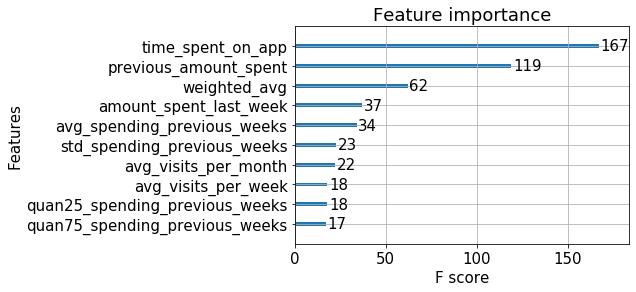

In [310]:
matplotlib.rcParams.update({'font.size': 15})
xgb.plot_importance(bst,max_num_features=10)

In [321]:
result_comparison = X_test.copy()
result_comparison['real'] = y_test
result_comparison['predicted'] = preds
result_comparison.shape


(6195, 106)

In [322]:
result_comparison[result_comparison['real']==0]

,month_num,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,BAG SNACKS | POTATO CHIPS,BAG SNACKS | TORTILLA/NACHO CHIPS,BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHEAT/MULTIGRAIN BR,BAKED BREAD/BUNS/ROLLS | MAINSTREAM WHITE BREAD,BAKED SWEET GOODS | SNACK CAKE - MULTI PACK,BEERS/ALES | BEERALEMALT LIQUORS,CANDY - CHECKLANE | CANDY BARS (SINGLES)(INCLUDING,CHEESE | SHREDDED CHEESE,COLD CEREAL | KIDS CEREAL,FLUID MILK PRODUCTS | FLUID MILK WHITE ONLY,FRZN MEAT/MEAT DINNERS | FRZN SS PREMIUM ENTREES/DNRS/N,FRZN MEAT/MEAT DINNERS | SS ECONOMY ENTREES/DINNERS ALL,FRZN VEGETABLE/VEG DSH | FRZN BAGGED VEGETABLES - PLAIN,REFRGRATD JUICES/DRNKS | DAIRY CASE 100% PURE JUICE - O,SOFT DRINKS | SFT DRNK 2 LITER BTL CARB INCL,SOFT DRINKS | SFT DRNK SNGL SRV BTL CARB (EX,SOFT DRINKS | SOFT DRINKS 12/18&15PK CAN CAR,SOUP | CONDENSED SOUP,TROPICAL FRUIT | BANANAS,YOGURT | YOGURT NOT MULTI-PACKS,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,avg_visits_per_month,avg_visits_per_week,weighted_avg,avg_spending_previous_weeks_real_time,std_spending_previous_weeks_real_time,var_spending_previous_weeks_real_time,quan25_spending_previous_weeks_real_time,quan50_spending_previous_weeks_real_time,quan75_spending_previous_weeks_real_time,avg_spending_previous_weeks,std_spending_previous_weeks,var_spending_previous_weeks,quan25_spending_previous_weeks,quan50_spending_previous_weeks,quan75_spending_previous_weeks,last_shopping_day,days_since_last_shopping,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,quantity_bought_last_week,previous_amount_spent,previous_quantity,month_x,month_y,time_spent_on_app,cluster,difference_fuel_price,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_fall,season_spring,season_summer,season_winter,real,predicted
24831,11,2.0,0.0,2.0,0.0,0.122581,0.042553,0.029703,0.333333,0.099379,0.000000,0.000000,0.039326,0.000000,0.168224,0.000000,0.179372,0.285714,0.244444,0.004914,0.002907,0.530035,0.283582,0.018072,0.000000,0.000000,0.024886,0.000000,0.000000,0.073256,0.901858,0.000000,0.000000,0.978268,0.021732,1.272727,1.000000,99.854545,95.351818,86.911276,7553.569877,0.0,92.97,151.6575,100.837647,21.271024,452.456457,92.5300,105.235,114.70,600.0,7.0,86.0,1.0,114.66,50.0,114.66,50.0,-0.500428,-0.865778,57.435976,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,46.867397
25032,11,5.0,3.0,2.0,1.0,0.206452,0.308511,0.000000,0.016393,0.118012,0.005714,0.068323,0.269663,0.417476,0.214953,0.002506,0.004484,0.003968,0.100000,0.022113,0.002907,0.155477,0.082090,0.240964,0.132231,0.172356,0.045933,0.113780,0.056469,0.268437,0.282343,0.060683,0.451327,0.444585,0.104088,9.000000,1.725490,171.316364,47.061325,60.756394,3691.339407,0.0,25.20,64.5200,76.354706,101.098517,10220.910109,15.4100,27.460,103.50,600.0,5.0,86.0,1.0,483.99,127.0,483.99,127.0,-0.500428,-0.865778,83.726001,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,266.142670
25116,11,2.0,0.0,2.0,0.0,0.154839,0.276596,0.049505,0.005464,0.006211,0.074286,0.010352,0.224719,0.000000,0.168224,0.015038,0.022422,0.003968,0.288889,0.036855,0.011628,0.095406,0.216418,0.216867,0.043388,0.090397,0.057334,0.058741,0.063665,0.239536,0.378473,0.111854,0.067534,0.650369,0.282096,8.666667,2.192982,125.644000,6.460625,12.658668,160.241867,0.

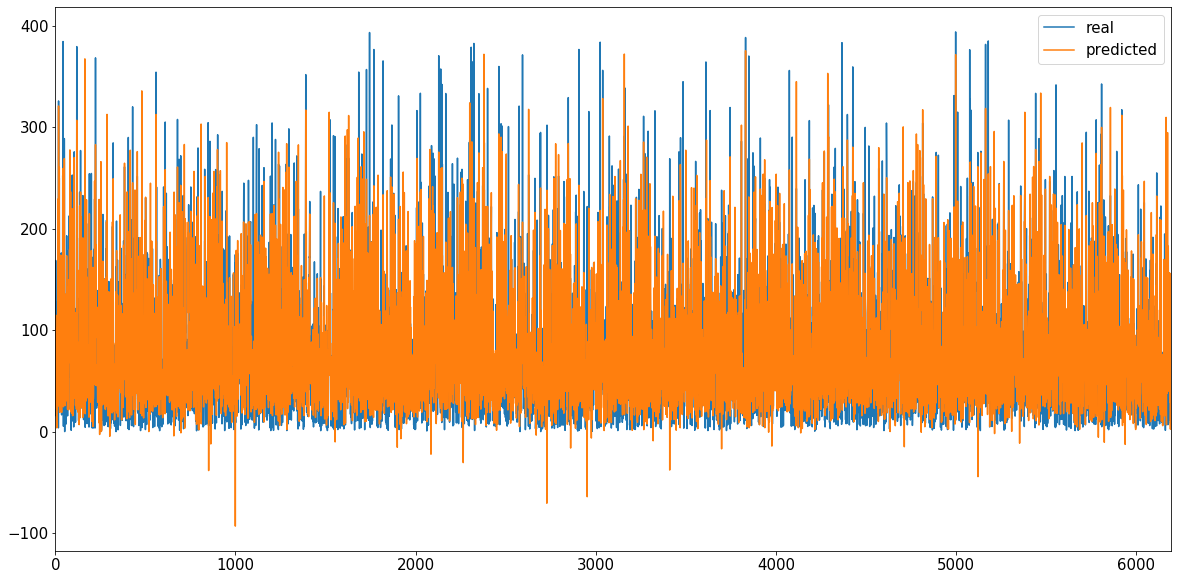

In [311]:
results = pd.DataFrame({ 'real':y_test, 'predicted':preds})#.sort_values(by='real')
results = results.reset_index().drop('index', axis=1)#.head(1000)
results.plot(figsize=(20,10))

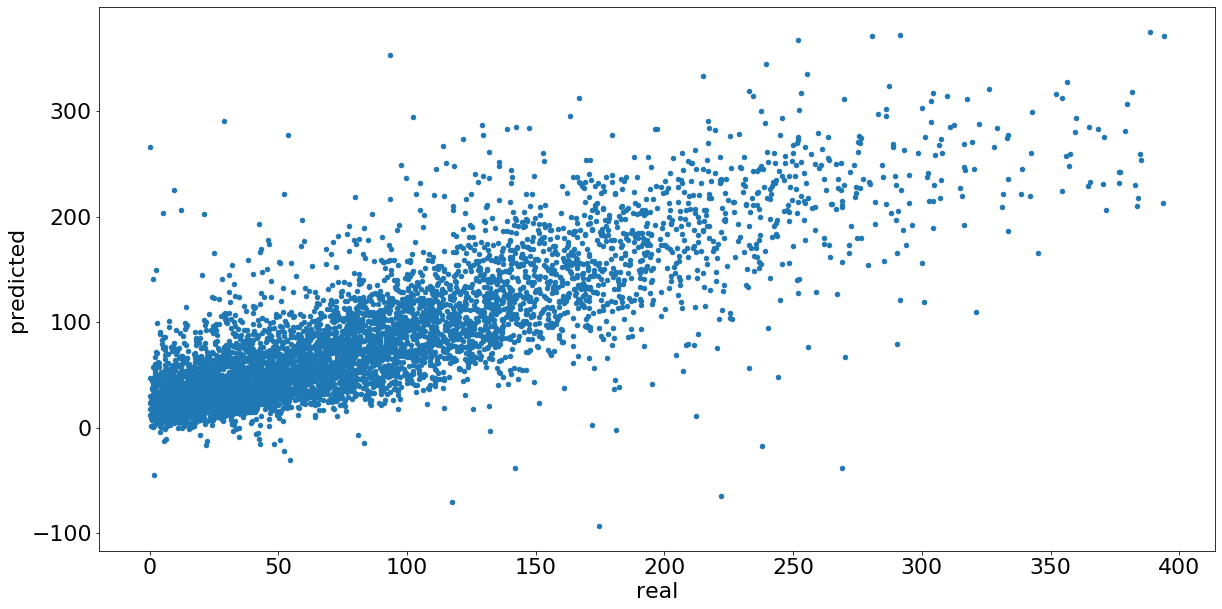

In [312]:
matplotlib.rcParams.update({'font.size': 22})
results.plot(kind='scatter',figsize=(20,10), x='real', y='predicted')

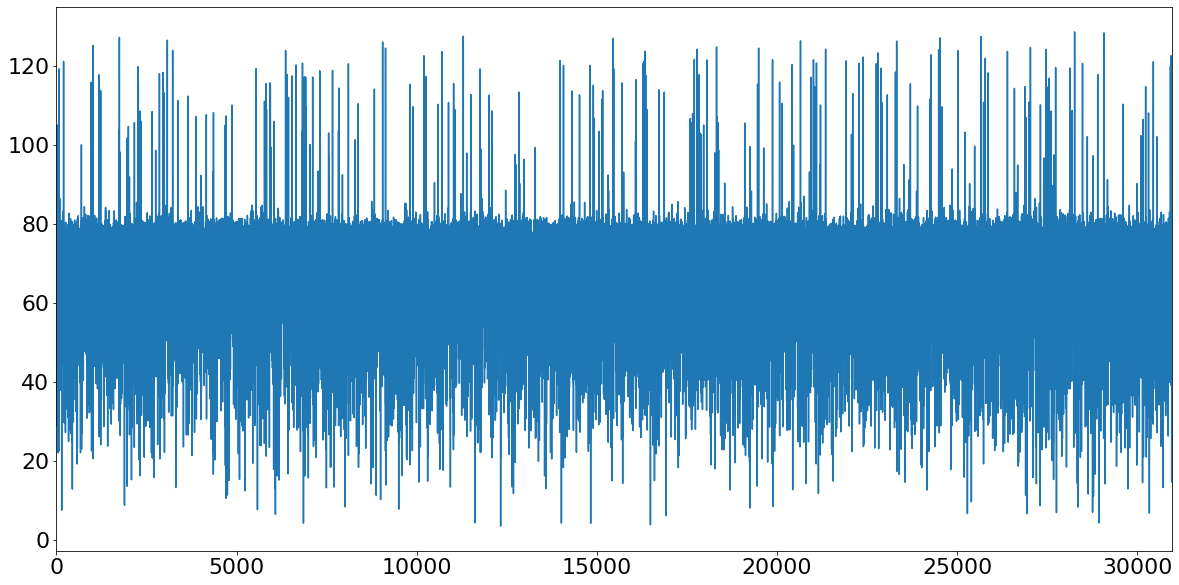

In [313]:
(data['time_spent_on_app']).plot(figsize=(20,10))

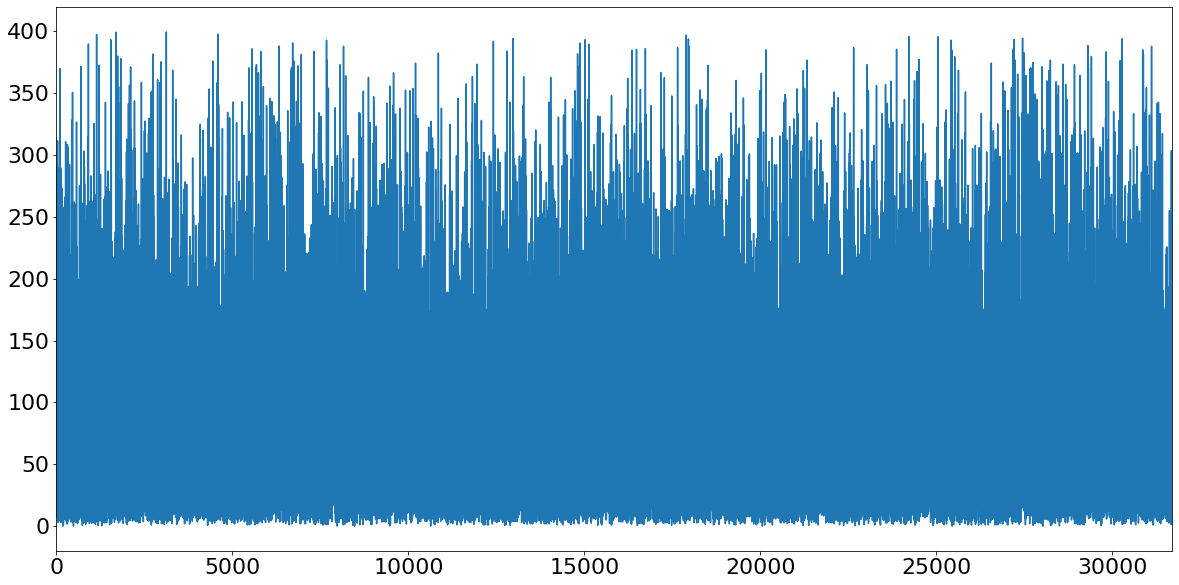

In [25]:
data['SALES_VALUE'].plot(figsize=(20,10))

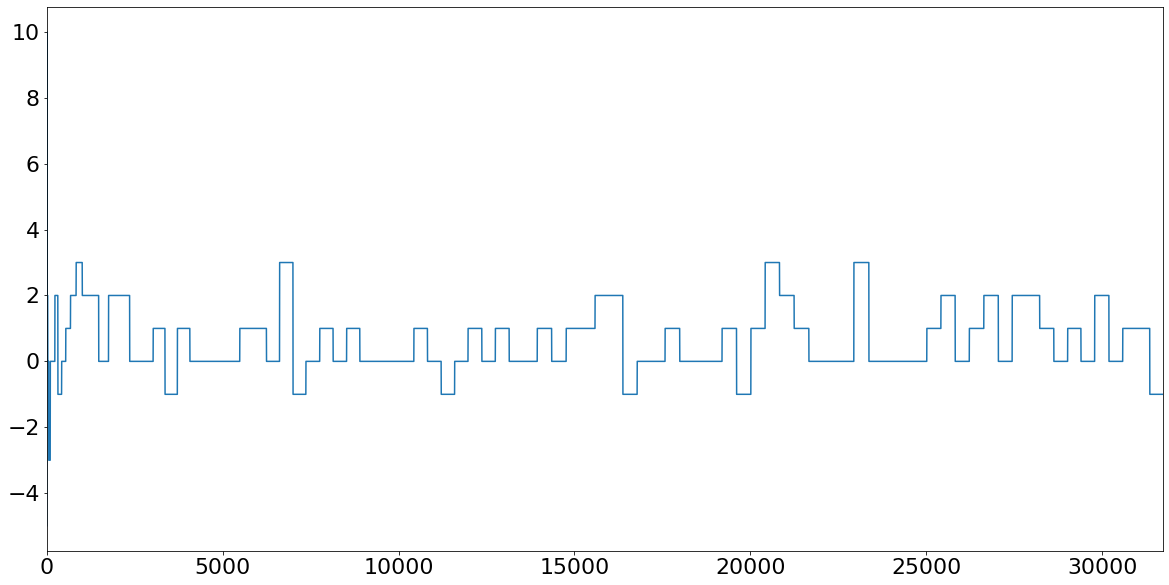

In [26]:
data['difference_fuel_price'].plot(figsize=(20,10))

## Random Forest

In [325]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4,n_estimators=200)
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [326]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted = regr.predict(X_test)
mae = mean_absolute_error(y_test, predicted)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, predicted)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, predicted) 
print('R2: ' + str(r2))

mean absolute error: 40.545095931306335
mean squared error: 3074.2951876845927
root mean squared error: 55.446327089218386
R2: 0.3594677808886685


## SVM

In [344]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

# option 1 - temporal split
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

# y_train = sc_y.fit_transform(y_train)

from sklearn.svm import SVR
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [345]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted = regr.predict(X_test)
mae = mean_absolute_error(y_test, predicted)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, predicted)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, predicted) 
print('R2: ' + str(r2))

mean absolute error: 41.351088985796245
mean squared error: 3386.7851826201363
root mean squared error: 58.19609250302065
R2: 0.29436020413157016


## NN

In [420]:
from sklearn.neural_network import MLPRegressor

In [421]:
nn = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

X = data[columns_to_predict_on]
X = pd.get_dummies(X)
print(X.shape)

y = data['SALES_VALUE']

# option 1 - temporal split
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

n = nn.fit(X_train, y_train)

(30974, 104)


In [422]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted = n.predict(X_test)
mae = mean_absolute_error(y_test, predicted)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, predicted)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, predicted) 
print('R2: ' + str(r2))

mean absolute error: 40.10004481563061
mean squared error: 3106.12945832305
root mean squared error: 55.732660606892345
R2: 0.3528350814336759


In [372]:
len(y)

30974

In [426]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = data[columns_to_predict_on]
X = pd.get_dummies(X)
X = np.array(X)
polynomial_features= PolynomialFeatures(degree=4)
X = polynomial_features.fit_transform(X)
print(X.shape)

y = np.array(data['SALES_VALUE'].tolist())

# transforming the data to include another axis

# X = X[:, np.newaxis]
y = y[:, np.newaxis]

# option 1 - temporal split
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



(30974, 5565)


## Poly model

In [427]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, y_pred) 
print('R2: ' + str(r2))

mean absolute error: 37.746629999972484
mean squared error: 2867.8789421748534
root mean squared error: 53.55258109722494
R2: 0.40247479476509507


## Linear model

In [425]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mae = mean_absolute_error(y_test, y_pred)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, y_pred) 
print('R2: ' + str(r2))

mean absolute error: 40.42510087346121
mean squared error: 3020.850420013852
root mean squared error: 54.96226359979956
R2: 0.3706030472004932


In [414]:
flat_y_test = flat_list = [item for sublist in y_test for item in sublist]
flat_preds = flat_list = [item for sublist in y_pred for item in sublist]

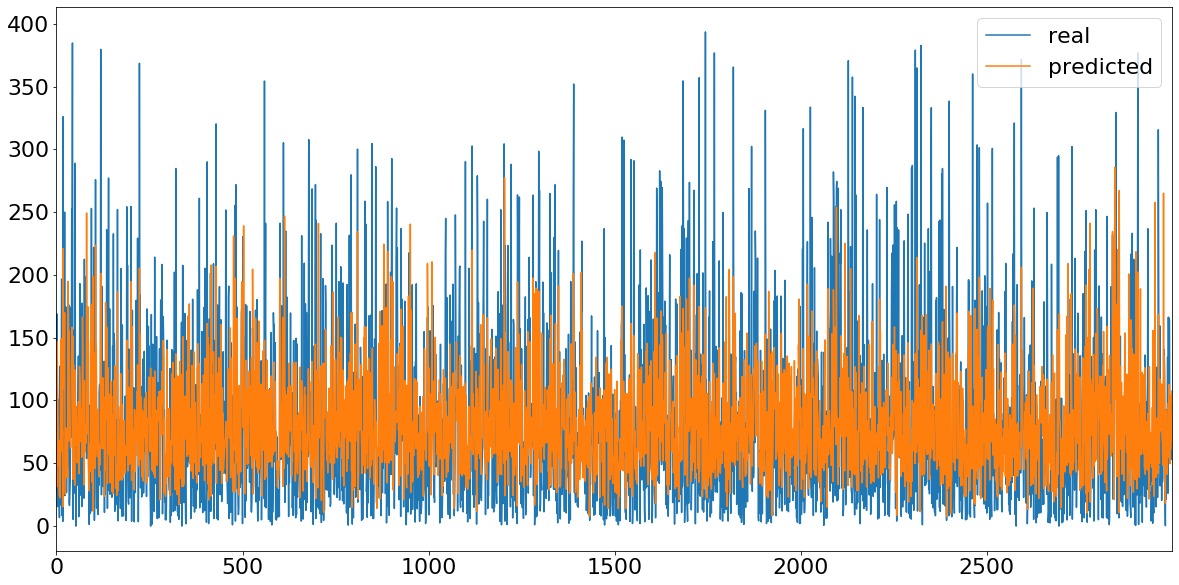

In [415]:
results = pd.DataFrame({'real':flat_y_test, 'predicted':flat_preds})#.sort_values(by='real')
results = results.reset_index().drop('index', axis=1).head(3000)
results.plot(figsize=(20,10))

In [ ]:
# random forest
# svm
# polynomial regression
# neural network